In [3]:
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/ralbu85/DataScience_2022S/master/data/auto.csv')
# 강의자료 보고 이해하는게 빠름

In [4]:
df=pd.get_dummies(df,columns=['origin'])
y=df['mpg']
X=df.drop(columns=['mpg'])

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_validate
from sklearn.preprocessing import PolynomialFeatures

reg= LinearRegression()
kfold = KFold(5,shuffle=True)
result=cross_validate(estimator=reg, X=X, y=y, cv=kfold, scoring=['neg_mean_squared_error','r2'], return_train_score=True)
result # 교차검증

{'fit_time': array([0.0022223 , 0.        , 0.        , 0.00462174, 0.00153899]),
 'score_time': array([0., 0., 0., 0., 0.]),
 'test_neg_mean_squared_error': array([ -8.02933033,  -9.68090208, -14.83774609, -13.66298364,
        -10.73470408]),
 'train_neg_mean_squared_error': array([-11.49269608, -11.01996018,  -9.82217976, -10.00619808,
        -10.69362816]),
 'test_r2': array([0.82100236, 0.84367863, 0.80559558, 0.77081909, 0.81078183]),
 'train_r2': array([0.82254244, 0.81774048, 0.82449054, 0.83579907, 0.82588323])}

In [6]:
kfold = KFold(5,shuffle=True) # 하이퍼파라미터 찾기 
for i in range(1,5):
    transformer = PolynomialFeatures(degree=i, interaction_only=False) # 변수간 곱 사용 x 
    X_=transformer.fit_transform(X) #데이터에 차수 추가
    reg= LinearRegression()    
    result=cross_validate(estimator = reg, X =X_, y=y, cv=kfold, scoring=['neg_mean_squared_error','r2'], return_train_score=True)
    print(i,'train',result['train_neg_mean_squared_error'].mean(), result['train_r2'].mean())
    print(i,'test',result['test_neg_mean_squared_error'].mean(), result['test_r2'].mean())

1 train -10.613326262425089 0.8253549731434037
1 test -11.327709303803093 0.8139192514434461
2 train -11.369798826254936 0.8121924072146554
2 test -13.819622311885798 0.770275628539772
3 train -4.041711014841202 0.9334401240375773
3 test -9608.82487552775 -173.7185518980382
4 train -0.2863274040271442 0.9952814217888479
4 test -180625.82814166322 -2898.710340661855


In [7]:
from sklearn.linear_model import Ridge, Lasso
reg = Lasso(alpha=0.01) # 다중회귀 모형에서 제약 조건을 통해 일반화된 모형을 찾는다
# MSE가 최소가 되게 하는 가중치와 편향을 찾으면서 동시에, 가중치들의 절댓값의 합이 최소가 되게 한다는 것
reg.fit(X,y)
reg.coef_

array([-0.44629638,  0.02286369, -0.01762971, -0.00671945,  0.07651421,
        0.77615517, -2.56966676,  0.        ,  0.16691861])

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
lambdas = [0,0.0001,0.001,0.01,0.1,1]
for i in lambdas:
    reg = Lasso(alpha=i)
    reg.fit(X,y)
    print(i, reg.coef_)

0 [-0.48970942  0.02397864 -0.01818346 -0.00671038  0.07910304  0.77702694
 -2.76337047 -0.13336811  0.08985776]
0.0001 [-0.48927812  0.02396754 -0.01817795 -0.00671047  0.07907707  0.77701821
 -2.6293992   0.          0.22266311]
0.001 [-0.4853459   0.02386686 -0.0181282  -0.0067113   0.07884366  0.77693967
 -2.62396889  0.          0.21759332]
0.01 [-0.44629638  0.02286369 -0.01762971 -0.00671945  0.07651421  0.77615517
 -2.56966676  0.          0.16691861]
0.1 [-0.06660805  0.0126583  -0.01331772 -0.00673194  0.05328912  0.76251936
 -1.8486989   0.          0.        ]
1 [-0.          0.         -0.00734394 -0.00646937  0.          0.66308442
 -0.          0.          0.        ]


C:\Users\hwang\AppData\Local\Temp\ipykernel_18680\3602531645.py:6: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  reg.fit(X,y)
c:\Users\hwang\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\hwang\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.094e+03, tolerance: 2.382e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  m

<Figure size 1200x800 with 0 Axes>

In [9]:
import warnings
warnings.filterwarnings('ignore')

## 하이퍼패러미터 변경(다항식 추가)
kfold = KFold(5,shuffle=True)
lambdas = [0,0.001,0.01,0.1,0.5,1,10,100]
for l in lambdas:    
    reg= Lasso(alpha=l)
    result=cross_validate(estimator=reg, X=X, y=y, cv=kfold, scoring=['neg_mean_squared_error','r2'], return_train_score=True)
    print(l,'train',result['train_neg_mean_squared_error'].mean(), result['train_r2'].mean())
    print(l,'test',result['test_neg_mean_squared_error'].mean(), result['test_r2'].mean())

0 train -10.54733532413517 0.8264886399550374
0 test -11.924410789742419 0.8051470156278594
0.001 train -10.620807661672748 0.8250070920781741
0.001 test -11.236187903445922 0.8120956655443748
0.01 train -10.620728792791876 0.8252042348573368
0.01 test -11.278701805084918 0.8141342814726518
0.1 train -10.762525739096862 0.8227633823520415
0.1 test -11.30627759675167 0.8121744127440959
0.5 train -11.6093386256572 0.8086896840166066
0.5 test -12.08715737008627 0.795467088323569
1 train -11.690862816239509 0.8073336403756659
1 test -12.072617849493355 0.7967417043854897
10 train -18.03583789029284 0.7030789857876406
10 test -18.29016267899015 0.6983726401075108
100 train -18.64836780043996 0.6927914333603563
100 test -19.051804211035723 0.6816584678491335


In [10]:
# 1. 공정한 비교가 아님 (제대로 하려면 동일한 데이터셋으로 쪼개진 상태를 통제하면서 수행해야 하므로 반복이 더 추가됨)
# 2. 데이터의 결과물을 정리하기가 어려움
# 3. For loop를 써서 지저분해보임

import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import Lasso
kfold = KFold(5,shuffle=True)
for i in range(1,5):
    for j in [0,0.001,0.01,0.05,0.1,0.15,0.2]:
        transformer = PolynomialFeatures(degree=i, interaction_only=False)
        X_=transformer.fit_transform(X)
        reg= Lasso(alpha=j)    
        result=cross_validate(estimator=reg, X=X_, y=y, cv=kfold, scoring=['neg_mean_squared_error','r2'], return_train_score=True)
    #     print(i,'train',result['train_neg_mean_squared_error'].mean(), result['train_r2'].mean())
        print(i,j,'test',result['test_neg_mean_squared_error'].mean(), result['test_r2'].mean())

1 0 test -11.315211364550738 0.813191538886415
1 0.001 test -11.199882394758932 0.8119085005637334
1 0.01 test -11.225699847916 0.8133189361806688
1 0.05 test -11.45956889842493 0.8090544797817568
1 0.1 test -11.196642805909255 0.8174697086636691
1 0.15 test -11.542049486499497 0.8067633848075066
1 0.2 test -11.547584865371789 0.8059339909590589
2 0 test -8.181441874400837 0.8629923743941781
2 0.001 test -8.042727869341169 0.8629670990147419
2 0.01 test -8.089731837805886 0.8643964550122387
2 0.05 test -8.137655862246486 0.8641505192070644
2 0.1 test -7.9760227355630295 0.8665776018491259
2 0.15 test -8.262956501430953 0.8634203636185717
2 0.2 test -8.445090910023197 0.8551976843586647
3 0 test -8.039609293100307 0.8655931231691849
3 0.001 test -7.849348432348127 0.8659899365699193
3 0.01 test -10.626570906556335 0.8085956748907922
3 0.05 test -7.970574966292435 0.8662233148753036
3 0.1 test -7.906713219223768 0.869628495053773
3 0.15 test -7.516318759604024 0.8774367280647635
3 0.2 te

In [11]:
import numpy as np
import matplotlib.pyplot as plt
random_state = np.random.seed(42) 

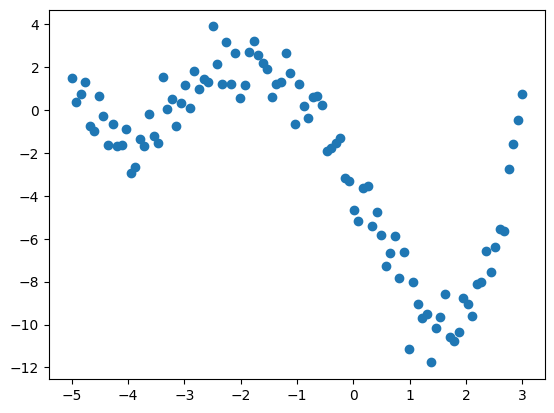

In [12]:
X=np.linspace(-5,3,100)
y=0.1*(X-3)*(X+3)*(X+1)*(X+5)+ np.random.normal(1,size=100)
plt.scatter(X,y)

In [13]:
from sklearn.pipeline import make_pipeline # 파이프라인 만들기 
from sklearn.preprocessing import PolynomialFeatures # 다항식이 추가되도록 데이터 변환
from sklearn.linear_model import LinearRegression # 선형회귀분석
from sklearn.model_selection import KFold, cross_validate #교차검증용 객체


# 파이프라이닝에 들어갈 재료
poly = PolynomialFeatures(degree=2) 
reg = LinearRegression() 

# 파이프라인이 없을때
# X_ = poly.fit_transform(X.reshape(-1,1))
# reg.fit(X_, y)

# 파이프라인 만들기
pipe = make_pipeline(poly, reg) #두가지 스텝을 동시에 수행

# 파이프라인에 넣어서 학습
# X: 첫번째 단계에서 들어가야할 데이터를 넣어준다
# y: 타겟변수(레이블)을 그대로 넣어준다
pipe.fit(X.reshape(-1,1),y) #학습

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [14]:
# 파이프라인에 들어갈 재료 만들기
poly = PolynomialFeatures(degree=2)
reg = LinearRegression()

# 파이프라인 만들기
pipe = make_pipeline(poly, reg) #두가지 스텝을 동시에 수행
# 파이프라이닝과 CrossValidate 같이사용
# 교차검증 객체
kfold = KFold(n_splits=5, shuffle=True) #데이터 쪼갤 방식
metrics = ['neg_mean_absolute_error','neg_mean_squared_error','r2'] #기록할 메트릭

# 교차검증 수행
result=cross_validate(X=X.reshape(-1,1),y=y,
                      estimator=pipe, # 파이프라인을 estimator로 두었음
                      scoring=metrics,
                      cv=kfold,
                      return_train_score=True                    
                     )

In [15]:
## 결과를 데이터프레임으로 변환
import pandas as pd
df=pd.DataFrame(result)
df


,fit_time,score_time,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_mean_squared_error,train_neg_mean_squared_error,test_r2,train_r2
0,0.003522,0.000000,-2.241918,-2.353475,-7.630729,-8.758730,0.579303,0.493003
1,0.000000,0.000000,-2.044803,-2.348009,-7.334742,-8.794636,0.521251,0.511915
2,0.000000,0.000000,-2.744131,-2.168162,-12.465571,-7.507504,0.413065,0.546784
3,0.006509,0.001527,-2.047630,-2.348438,-5.725238,-9.225774,0.593016,0.466439
4,0.000000,0.000000,-2.516258,-2.208842,-11.008511,-7.990546,0.214436,0.557612


In [16]:
# 각각의 trial에 대한 평균값 계산
df.mean()

fit_time                         0.002006
score_time                       0.000305
test_neg_mean_absolute_error    -2.318948
train_neg_mean_absolute_error   -2.285385
test_neg_mean_squared_error     -8.832958
train_neg_mean_squared_error    -8.455438
test_r2                          0.464214
train_r2                         0.515150
dtype: float64

In [17]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression

from sklearn.pipeline import make_pipeline, Pipeline
import numpy as np
# 최적의 하이퍼패러미터 한번에 찾기: GridSearchCV

# 1) 파이프라인 재료 만들기
poly = PolynomialFeatures() #degree는 잡지 않는다.
reg = LinearRegression()

# 2) Pipeline을 이용한 파이프라인만들기
# pipe = make_pipeline(poly, reg)
pipe = Pipeline([('poly', poly), ('reg', reg)]) # 이름을 붙일때는 튜플형식('이름', estimator 객체)의 리스트로 순서대로 구현한다

# 3) 하이퍼패러미터 범주 지정
degrees = range(1,20) #1~19까지의 리스트
param_grid = {'poly__degree': degrees} # 탐색할 하이퍼패러미터의 범주를 딕셔너리 형태로 지정 (키: 파이프라인스텝이름__패러미터, 밸류: 리스트)

# 4) 교차검증 객체 지정
kfold = KFold(n_splits=5, shuffle=True) #데이터 쪼갤 방식

# 5) GridSearchCV를 이용하여 하이퍼패러미터 튜닝 자동화
grid_search = GridSearchCV(
    pipe, # 파이프라인
    param_grid, #탐색할 패러미터 범주
    cv=kfold, #교차검증 객체
    scoring='neg_mean_squared_error', #스코어
    return_train_score=True #훈련데이터 점수 반환 여부
)

# GridSearchCV 학습
grid_search.fit(X.reshape(-1,1), y)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                       ('reg', LinearRegression())]),
             param_grid={'poly__degree': range(1, 20)}, return_train_score=True,
             scoring='neg_mean_squared_error')

In [18]:
grid_search.cv_results_

{'mean_fit_time': array([0.00160809, 0.00100961, 0.00156879, 0.00142083, 0.00163326,
        0.        , 0.        , 0.00041723, 0.0002017 , 0.00202208,
        0.00060096, 0.00161781, 0.00161648, 0.00122337, 0.00132666,
        0.00292878, 0.00030122, 0.00060129, 0.        ]),
 'std_fit_time': array([0.0020662 , 0.0015523 , 0.00313759, 0.00184185, 0.00203108,
        0.        , 0.        , 0.00083447, 0.0004034 , 0.00247659,
        0.00120192, 0.00276105, 0.00187239, 0.00152795, 0.00265331,
        0.00313176, 0.00060244, 0.00120258, 0.        ]),
 'mean_score_time': array([0.        , 0.00089769, 0.        , 0.        , 0.        ,
        0.00040598, 0.00160146, 0.        , 0.00070524, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00010157,
        0.        , 0.        , 0.        , 0.00030913]),
 'std_score_time': array([0.        , 0.00140845, 0.        , 0.        , 0.        ,
        0.00081196, 0.00320292, 0.        , 0.00141048, 0.        ,
        

In [19]:
df = pd.DataFrame(grid_search.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_poly__degree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.001608,0.002066,0.000000,0.000000,1,{'poly__degree': 1},-13.312798,-6.677771,-6.862529,-10.611491,...,-9.944875,2.732066,19,-8.554623,-10.022263,-9.980159,-9.064770,-8.781238,-9.280611,0.610317
1,0.001010,0.001552,0.000898,0.001408,2,{'poly__degree': 2},-13.252032,-5.775681,-4.669818,-15.145469,...,-9.786401,4.076446,17,-7.467678,-9.183019,-9.562876,-7.206901,-8.342687,-8.352632,0.921973
2,0.001569,0.003138,0.000000,0.000000,3,{'poly__degree': 3},-8.428931,-3.290737,-4.178403,-7.579471,...,-5.999870,1.965963,16,-4.595402,-5.774268,-5.609139,-4.908225,-5.091413,-5.195689,0.438075
3,0.001421,0.001842,0.000000,0.000000,4,{'poly__degree': 4},-0.489982,-1.112275,-0.599248,-0.810266,...,-0.847077,0.283690,1,-0.843636,-0.681961,-0.816510,-0.766584,-0.662560,-0.754250,0.071626
4,0.001633,0.002031,0.000000,0.000000,5,{'poly__degree': 5},-0.540820,-1.127807,-0.607623,-0.819265,...,-0.871469,0.282758,2,-0.839634,-0.680597,-0.815961,-0.765581,-0.657620,-0.751879,0.072057
5,0.000000,0.000000,0.000406,0.000812,6,{'poly__degree': 6},-0.603775,-1.176199,-0.607051,-0.991753,...,-0.929310,0.279010,5,-0.836045,-0.676997,-0.815927,-0.744145,-0.657388,-0.746101,0.071575
6,0.000000,0.000000,0.001601,0.003203,7,{'poly__degree': 7},-0.652273,-1.207430,-0.606790,-0.990924,...,-0.959830,0.292353,7,-0.835382,-0.674878,-0.815925,-0.744088,-0.647705,-0.743596,0.074261
7,0.000417,0.000834,0.000000,0.000000,8,{'poly__degree': 8},-0.535112,-1.214926,-0.599290,-0.953366,...,-0.922497,0.313367,4,-0.832481,-0.658467,-0.803096,-0.735962,-0.636603,-0.733322,0.077027
8,0.000202,0.000403,0.000705,0.001410,9,{'poly__degree': 9},-0.569453,-1.160523,-0.645624,-0.911793,...,-0.921500,0.288499,3,-0.798370,-0.652427,-0.773254,-0.725840,-0.614724,-0.712923,0.069872
9,0.002022,0.002477,0.000000,0.000000,10,{'poly__degree': 10},-0.551882,-1.159414,-0.675378,-0.915074,...,-0.932412,0.298595,6,-0.798042,-0.652341,-0.771831,-0.725746,-0.608893,-0.711371,0.071218


In [20]:
df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_poly__degree', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score', 'split0_train_score', 'split1_train_score',
       'split2_train_score', 'split3_train_score', 'split4_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')

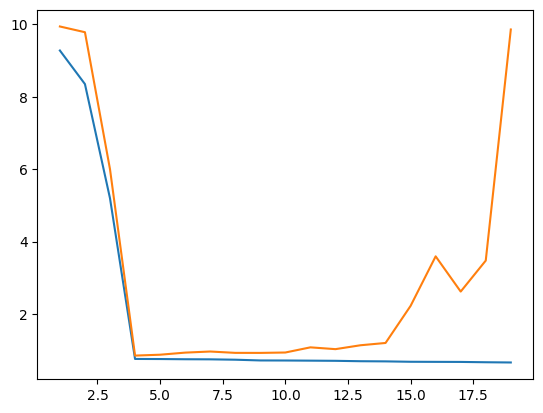

In [21]:
plt.plot(df['param_poly__degree'],-1*df['mean_train_score'])
plt.plot(df['param_poly__degree'],-1*df['mean_test_score'])

In [22]:
# Print the best hyperparameters and mean score
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", -1*grid_search.best_score_)

Best hyperparameters: {'poly__degree': 4}
Best score: 0.8470766870807906


In [23]:
best_model = grid_search.best_estimator_
best_model
# best_model.predict()

Pipeline(steps=[('poly', PolynomialFeatures(degree=4)),
                ('reg', LinearRegression())])

In [24]:
import warnings
warnings.filterwarnings('ignore')

In [28]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge

from sklearn.pipeline import make_pipeline, Pipeline
import numpy as np

# 1) 파이프라인 재료 만들기
poly = PolynomialFeatures() #degree는 잡지 않는다.
reg = Ridge()

# 2) 파이프라인 만들기
pipe = Pipeline(steps=[('poly', PolynomialFeatures()), ('ridge', Ridge())])

# 3) 하이퍼패러미터 범위 지정
degrees = range(1,20) # poly의 degree에 대한 범위
alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10] # ridge의 alpha에 대한 범위 / 두개의 하이퍼패러미터를 이용한 예시
param_grid = {'poly__degree': degrees,
              'ridge__alpha': alphas}

# 4) 교차검증 객체 만들기
kfold = KFold(n_splits=5, shuffle=True) #데이터 쪼갤 방식

# 5) GridSearchCV 만들기
grid_search = GridSearchCV(pipe, param_grid, cv=kfold, scoring='neg_mean_squared_error', return_train_score=True)

# 탐색시작
grid_search.fit(X.reshape(-1,1), y)

In [26]:

pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_poly__degree,param_ridge__alpha,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.001617,0.002085,0.000000,0.000000,1,0.0001,"{'poly__degree': 1, 'ridge__alpha': 0.0001}",-9.502361,-12.491685,-10.068752,...,-9.736938,1.834126,112,-9.426204,-8.566635,-9.241751,-9.256004,-10.022560,-9.302631,0.465003
1,0.000201,0.000402,0.001431,0.002862,1,0.001,"{'poly__degree': 1, 'ridge__alpha': 0.001}",-9.502346,-12.491689,-10.068757,...,-9.736937,1.834129,111,-9.426204,-8.566635,-9.241751,-9.256004,-10.022560,-9.302631,0.465003
2,0.001690,0.003381,0.000000,0.000000,1,0.01,"{'poly__degree': 1, 'ridge__alpha': 0.01}",-9.502205,-12.491729,-10.068803,...,-9.736932,1.834159,110,-9.426204,-8.566635,-9.241751,-9.256004,-10.022560,-9.302631,0.465003
3,0.000000,0.000000,0.000502,0.001004,1,0.1,"{'poly__degree': 1, 'ridge__alpha': 0.1}",-9.500791,-12.492128,-10.069263,...,-9.736881,1.834460,109,-9.426204,-8.566635,-9.241751,-9.256004,-10.022561,-9.302631,0.465003
4,0.000000,0.000000,0.000000,0.000000,1,1,"{'poly__degree': 1, 'ridge__alpha': 1}",-9.486739,-12.496147,-10.073907,...,-9.736415,1.837477,108,-9.426255,-8.566676,-9.241794,-9.256041,-10.022603,-9.302674,0.465004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,0.000000,0.000000,0.000000,0.000000,19,0.001,"{'poly__degree': 19, 'ridge__alpha': 0.001}",-5.629909,-1.522257,-310.947403,...,-64.267958,123.349954,114,-0.650033,-0.681245,-2.845742,-0.671087,-0.719388,-1.113499,0.866413
110,0.000302,0.000603,0.001331,0.002663,19,0.01,"{'poly__degree': 19, 'ridge__alpha': 0.01}",-3.783975,-3.202896,-30.614563,...,-8.064865,11.317054,100,-0.649274,-0.689741,-0.682757,-0.671912,-0.621270,-0.662991,0.024958
111,0.001701,0.003403,0.000000,0.000000,19,0.1,"{'poly__degree': 19, 'ridge__alpha': 0.1}",-2.427451,-1.210066,-17.977426,...,-4.844588,6.581896,93,-0.655063,-0.684290,-0.633479,-0.676866,-0.630132,-0.655966,0.021968
112,0.001023,0.001992,0.000000,0.000000,19,1,"{'poly__degree': 19, 'ridge__alpha': 1}",-1.101848,-0.870059,-6.733413,...,-2.294830,2.228993,91,-0.707940,-0.749745,-0.670233,-0.711221,-0.687497,-0.705327,0.026698


In [27]:
# Print the best hyperparameters and mean score
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", -1*grid_search.best_score_)

Best hyperparameters: {'poly__degree': 4, 'ridge__alpha': 0.0001}
Best score: 0.8127062322818496
